In [1]:
#Library yang di butuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import os




Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
!ls "/content/drive/My Drive/langit/"

test   trainmy_modelaug.h5    trainmy_model.h	trainmy_modell.hdf5
train  trainmy_modelaug.hdf5  trainmy_model.h5	trainmy_modll.h5


In [16]:
import pathlib
train_dir = '/content/drive/My Drive/langit/train'

test_dir = '/content/drive/My Drive/langit/test'

train_mendung_dir = os.path.join(train_dir, 'Mendung')
train_cerah_dir = os.path.join(train_dir, 'Cerah')
train_berawan_dir = os.path.join(train_dir, 'Berawan')


test_mendung_dir = os.path.join(test_dir, 'Mendung')
test_cerah_dir = os.path.join(test_dir, 'Cerah')
test_berawan_dir = os.path.join(test_dir, 'Berawan')

print('total training Cerah images :', len(os.listdir(train_cerah_dir)))
print('total training Mendung images :', len(os.listdir(train_mendung_dir)))
print('total training Berawan images :', len(os.listdir(train_berawan_dir)))


print('total test Mendung images :', len(os.listdir(test_mendung_dir)))
print('total test Cerah images :', len(os.listdir(test_cerah_dir)))
print('total test Berawan images :', len(os.listdir(test_berawan_dir)))

total training Cerah images : 240
total training Mendung images : 240
total training Berawan images : 240
total test Mendung images : 60
total test Cerah images : 60
total test Berawan images : 60


*Pre-processing*

In [17]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255)
    

In [18]:
#Pengaplikasiannya

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    color_mode = 'rgb',
                                                    class_mode='categorical',
                                                    batch_size = 32)

test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size = (150, 150),
                                                  color_mode = 'rgb',
                                                  class_mode='categorical',
                                                  batch_size = 32)

Found 720 images belonging to 3 classes.
Found 179 images belonging to 3 classes.


Membuat Model CNN

In [19]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    ##tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 64)      

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
# training 
history = model.fit (train_generator,
                     epochs = 10,
                     validation_data = test_generator,
                     verbose=1)


Epoch 1/10
23/23 [==============================] - 150s 7s/step - loss: 1.0868 - accuracy: 0.3222 - val_loss: 1.0795 - val_accuracy: 0.3352
Epoch 2/10
23/23 [==============================] - 67s 3s/step - loss: 1.0377 - accuracy: 0.4292 - val_loss: 0.9295 - val_accuracy: 0.6704
Epoch 3/10
23/23 [==============================] - 65s 3s/step - loss: 0.8512 - accuracy: 0.6250 - val_loss: 0.9047 - val_accuracy: 0.5922
Epoch 4/10
23/23 [==============================] - 58s 3s/step - loss: 0.7764 - accuracy: 0.6625 - val_loss: 0.6736 - val_accuracy: 0.7207
Epoch 5/10
23/23 [==============================] - 59s 3s/step - loss: 0.8062 - accuracy: 0.6417 - val_loss: 0.7115 - val_accuracy: 0.6983
Epoch 6/10
23/23 [==============================] - 66s 3s/step - loss: 0.6900 - accuracy: 0.7097 - val_loss: 0.6239 - val_accuracy: 0.6983
Epoch 7/10
23/23 [==============================] - 67s 3s/step - loss: 0.6362 - accuracy: 0.7292 - val_loss: 0.5871 - val_accuracy: 0.7430
Epoch 8/10
23/23 [=

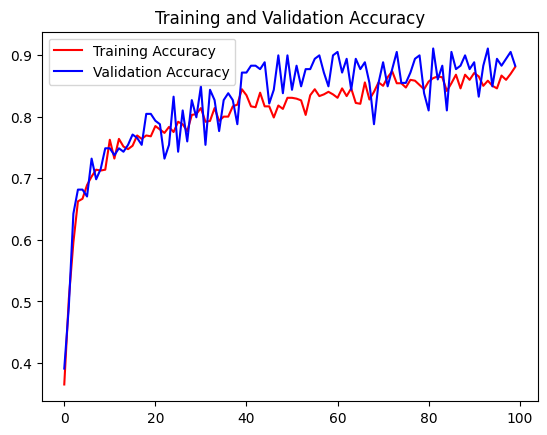

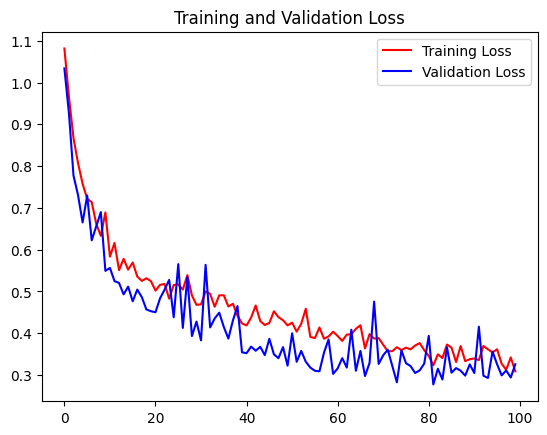

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()
     

Saving pexels-photo-3941855.jpeg to pexels-photo-3941855.jpeg
1/1 [==============================] - 0s 57ms/step
pexels-photo-3941855.jpeg
Ini adalah cuaca Berawan


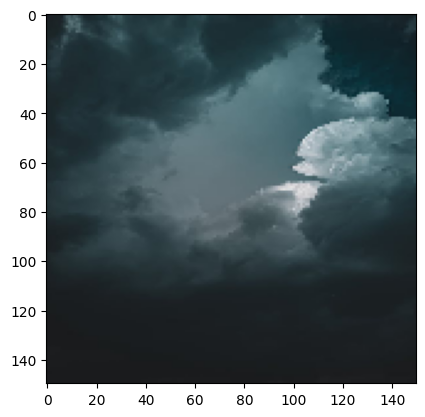

In [ ]:
# Prediksi dengan data test
import numpy as np
from keras.preprocessing import image
from google.colab import  files


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('Ini adalah cuaca', class_list[j])
      break

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
save_model = "/content/drive/MyDrive/trainmy_modelaug.hdf5"
model.save(save_model)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/trainmy_modelaug.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!tensorflowjs_converter --input_format=keras {save_model} ./

2023-05-27 00:58:41.060610: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
